In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [4]:
start1= dt.datetime(2017,2,2)
end1= dt.datetime(2023,2,16)
ticker1 = 'TATAMOTORS.NS'

In [5]:
def download_stock_data(ticker,start,end):
    data= yf.download(ticker,start,end)
    return data


In [6]:
data=download_stock_data(ticker=ticker1,start=start1,end=end1)

[*********************100%***********************]  1 of 1 completed


In [7]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-02,537.599976,537.599976,526.799988,531.500000,531.500000,6579801
2017-02-03,531.900024,531.900024,519.500000,522.599976,522.599976,5298261
2017-02-06,527.900024,531.450012,523.200012,525.849976,525.849976,3642527
2017-02-07,524.799988,524.799988,502.000000,506.799988,506.799988,7987282
2017-02-08,512.349976,514.950012,506.299988,513.049988,513.049988,5975054
...,...,...,...,...,...,...
2023-02-09,440.000000,440.700012,433.549988,436.750000,436.750000,7349418
2023-02-10,437.950012,447.799988,431.200012,445.850006,445.850006,14798390
2023-02-13,445.500000,446.899994,438.899994,441.049988,441.049988,8333767


In [8]:
data.shape

(1494, 6)

In [9]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999404,0.999319,0.998792,0.998792,-0.408145
High,0.999404,1.000000,0.999208,0.999535,0.999535,-0.393777
Low,0.999319,0.999208,1.000000,0.999479,0.999479,-0.413874
Close,0.998792,0.999535,0.999479,1.000000,1.000000,-0.400959
Adj Close,0.998792,0.999535,0.999479,1.000000,1.000000,-0.400959
Volume,-0.408145,-0.393777,-0.413874,-0.400959,-0.400959,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1494 entries, 2017-02-02 to 2023-02-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1494 non-null   float64
 1   High       1494 non-null   float64
 2   Low        1494 non-null   float64
 3   Close      1494 non-null   float64
 4   Adj Close  1494 non-null   float64
 5   Volume     1494 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 81.7 KB


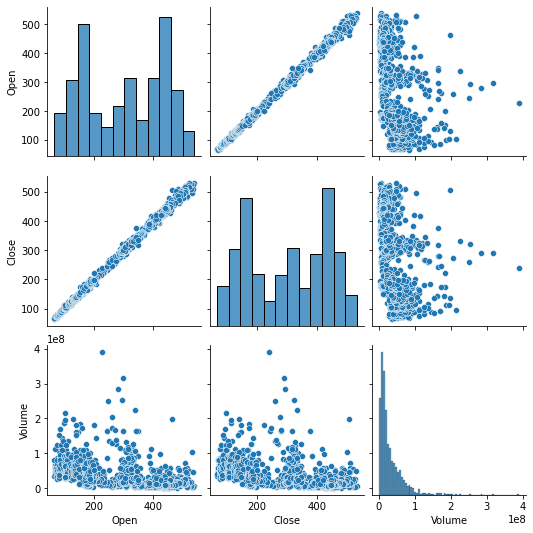

In [11]:
sns.pairplot(data[['Open','Close','Volume']])

<AxesSubplot:xlabel='Date', ylabel='Close'>

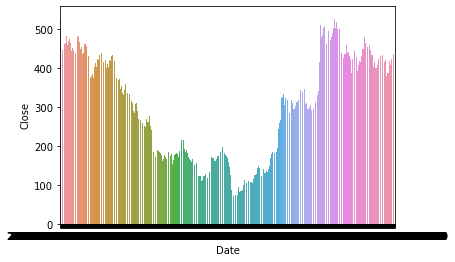

In [12]:
sns.barplot(x = data.index , y=data['Close'])

In [13]:
# variables
data['returns']= np.log(data['Close']/data['Close'].shift(1)) #daily returns

In [14]:
data['target']= np.where(data['returns'].shift(-1)>0,1,-1)

In [15]:
data

,Open,High,Low,Close,Adj Close,Volume,returns,target
Date,,,,,,,,
2017-02-02,537.599976,537.599976,526.799988,531.500000,531.500000,6579801,NaN,-1
2017-02-03,531.900024,531.900024,519.500000,522.599976,522.599976,5298261,-0.016887,1
2017-02-06,527.900024,531.450012,523.200012,525.849976,525.849976,3642527,0.006200,-1
2017-02-07,524.799988,524.799988,502.000000,506.799988,506.799988,7987282,-0.036900,1
2017-02-08,512.349976,514.950012,506.299988,513.049988,513.049988,5975054,0.012257,-1
...,...,...,...,...,...,...,...,...
2023-02-09,440.000000,440.700012,433.549988,436.750000,436.750000,7349418,-0.007641,1
2023-02-10,437.950012,447.799988,431.200012,445.850006,445.850006,14798390,0.020622,-1
2023-02-13,445.500000,446.899994,438.899994,441.049988,441.049988,8333767,-0.010824,-1


In [16]:
data['target'].value_counts()

-1    753
 1    741
Name: target, dtype: int64

In [17]:
#creating std columns 
for i in range(5,20,5):
    col_name= 'std_'+ str(i)
    data[col_name]= data['Close'].rolling(window=i).std()

In [18]:
# creating ma columns
for i in range (10,30,5):
    col_name= 'ma_' + str(i)
    data[col_name]= data['Close'].rolling(window=i).mean()

In [19]:
for i in range (3,12,3):
    col_name = 'pct_' + str(i)
    data[col_name]= data['Close'].pct_change().rolling(i).sum()

In [20]:
col_name= 'vma_4'
data[col_name]= data['Volume'].rolling(window= 4).mean()

In [21]:
#feature based on intraday movemnt 
col_name = 'IM'
data[col_name]= data['Close']- data['Open']

In [22]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,returns,target,std_5,std_10,std_15,ma_10,ma_15,ma_20,ma_25,pct_3,pct_6,pct_9,vma_4,IM
Date,,,,,,,,,,,,,,,,,,,,
2017-02-02,537.599976,537.599976,526.799988,531.500000,531.500000,6579801,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.099976
2017-02-03,531.900024,531.900024,519.500000,522.599976,522.599976,5298261,-0.016887,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.300049
2017-02-06,527.900024,531.450012,523.200012,525.849976,525.849976,3642527,0.006200,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.050049
2017-02-07,524.799988,524.799988,502.000000,506.799988,506.799988,7987282,-0.036900,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.046753,NaN,NaN,5876967.75,-18.000000
2017-02-08,512.349976,514.950012,506.299988,513.049988,513.049988,5975054,0.012257,-1,9.946948,NaN,NaN,NaN,NaN,NaN,NaN,-0.017676,NaN,NaN,5725781.00,0.700012


In [23]:
data.shape

(1494, 20)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1494 entries, 2017-02-02 to 2023-02-15
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1494 non-null   float64
 1   High       1494 non-null   float64
 2   Low        1494 non-null   float64
 3   Close      1494 non-null   float64
 4   Adj Close  1494 non-null   float64
 5   Volume     1494 non-null   int64  
 6   returns    1493 non-null   float64
 7   target     1494 non-null   int64  
 8   std_5      1490 non-null   float64
 9   std_10     1485 non-null   float64
 10  std_15     1480 non-null   float64
 11  ma_10      1485 non-null   float64
 12  ma_15      1480 non-null   float64
 13  ma_20      1475 non-null   float64
 14  ma_25      1470 non-null   float64
 15  pct_3      1491 non-null   float64
 16  pct_6      1488 non-null   float64
 17  pct_9      1485 non-null   float64
 18  vma_4      1491 non-null   float64
 19  IM         1494 non-null   flo

In [25]:
data.dropna(inplace=True)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
data['target']

Date
2017-03-09    1
2017-03-10    1
2017-03-14    1
2017-03-15    1
2017-03-16   -1
             ..
2023-02-09    1
2023-02-10   -1
2023-02-13   -1
2023-02-14    1
2023-02-15   -1
Name: target, Length: 1470, dtype: int64

In [28]:
data.shape

(1470, 20)

In [51]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,returns,target,std_5,std_10,std_15,ma_10,ma_15,ma_20,ma_25,pct_3,pct_6,pct_9,vma_4,IM
Date,,,,,,,,,,,,,,,,,,,,
2017-03-09,462.450012,469.700012,462.000000,467.600006,467.600006,3837624,0.010318,1,4.315866,6.203097,6.738607,461.675000,459.323334,466.802498,477.433995,-0.006691,0.040364,0.012247,5085013.25,5.149994
2017-03-10,471.000000,471.850006,465.100006,469.100006,469.100006,5766815,0.003203,1,2.980271,6.636804,6.084063,462.350000,460.863334,464.614999,474.937996,0.003420,0.016316,0.025296,5517644.25,-1.899994
2017-03-14,481.000000,483.000000,468.450012,469.750000,469.750000,6348198,0.001385,1,2.721541,6.800340,6.069583,463.545001,461.983333,462.625000,472.823997,0.014965,0.021492,0.028975,5326058.50,-11.250000
2017-03-15,475.000000,476.549988,470.649994,473.450012,473.450012,4801312,0.007846,1,3.863847,6.994043,6.452897,465.215002,463.183333,461.032501,470.727998,0.012470,0.005779,0.052834,5188487.25,-1.549988
2017-03-16,478.700012,482.000000,476.149994,480.950012,480.950012,6272947,0.015717,-1,5.359411,6.147090,7.768569,468.365002,464.670001,460.977502,469.693999,0.025103,0.028524,0.041420,5797318.00,2.250000


In [64]:
X = data[['std_5', 'std_10', 'std_15', 'ma_10', 'ma_25', 'vma_4', 'IM']]
Y = data['target']


In [65]:
splitting_ratio = .80
split = int(splitting_ratio * len(data))

In [66]:
#traininig dataset
X_train = X[:split]
Y_train = Y[:split]


In [67]:
#testing dataset
X_test = X[split:]
Y_test = Y[split:]

In [68]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape# hence we got a correct split

((1176, 7), (294, 7), (1176,), (294,))

In [69]:
X.describe()

,std_5,std_10,std_15,ma_10,ma_25,vma_4,IM
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1.470000e+03,1470.000000
mean,6.276213,8.902000,10.951809,298.226752,298.397401,3.249980e+07,-0.751190
std,4.821044,6.107856,7.334643,130.891964,130.399836,3.142865e+07,6.503836
min,0.578143,1.614423,1.859263,68.620000,72.356000,3.053525e+06,-32.399994
25%,3.158338,5.237794,6.418251,173.191250,173.529999,1.168762e+07,-4.100006
50%,5.052376,7.551312,9.446023,305.817500,307.156000,2.025059e+07,-0.850006
75%,7.907783,11.072877,13.124535,424.605003,421.421000,4.473875e+07,2.350006
max,54.514161,69.284022,73.040694,510.829999,503.522000,2.422788e+08,44.000000


In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()

In [72]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [73]:
#train logistic regression model
model = LogisticRegression(C=1, penalty='l2')

In [74]:
model.fit(X_train_scaled,Y_train)

LogisticRegression(C=1)

In [75]:
print('model accuracy on training data :',model.score(X_train_scaled,Y_train))

model accuracy on training data : 0.5348639455782312


In [45]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}


grid_search = GridSearchCV(model, param_grid, cv=5)


grid_search.fit(X_train_scaled, Y_train)


print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)


Best hyperparameters: {'C': 1, 'penalty': 'l2'}
Accuracy score: 0.46680851063829787


In [49]:
from sklearn.feature_selection import RFE, SelectFromModel

# RFE method
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=5, step=1)
rfe_selector.fit(X_train_scaled, Y_train)
rfe_support = rfe_selector.get_support()
rfe_features = X.columns[rfe_support].tolist()
print('Selected features by RFE:', rfe_features)

# SelectFromModel method
sfm_selector = SelectFromModel(estimator=LogisticRegression(), threshold='median')
sfm_selector.fit(X_train_scaled, Y_train)
sfm_support = sfm_selector.get_support()
sfm_features = X.columns[sfm_support].tolist()
print('Selected features by SelectFromModel:', sfm_features)

Selected features by RFE: ['std_10', 'std_15', 'ma_10', 'vma_4', 'IM']
Selected features by SelectFromModel: ['std_5', 'std_10', 'std_15', 'ma_10', 'ma_25', 'vma_4', 'IM']


In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [77]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


rf_model.fit(X_train_scaled, Y_train)


y_pred = rf_model.predict(X_test_scaled)


accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy of Random Forest on test set:', accuracy)

Accuracy of Random Forest on test set: 0.5306122448979592
